Assignment 1

In [67]:
# Run the whole code in ipynb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Erase the warnings
import warnings
warnings.filterwarnings("ignore")

Libraries used in assignment 1

In [68]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# Read data
data = pd.read_csv('dataset_assignment1.csv') 
# Print the data information
data.info()  
# Statistical description of features
data.describe()
# Count the number of samples for each class
data["class"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,4.415714,3.131429,3.204286,2.804286,3.214286,3.557143,3.437143,2.864286,1.588571,0.344286
std,2.814236,3.050343,2.970958,2.854153,2.213193,3.613026,2.436676,3.052265,1.713995,0.475475
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


0    459
1    241
Name: class, dtype: int64

<Axes: xlabel='feature1', ylabel='Count'>

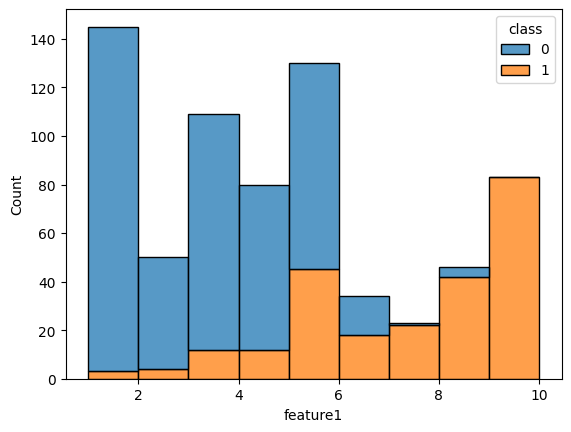

<Axes: xlabel='feature2', ylabel='Count'>

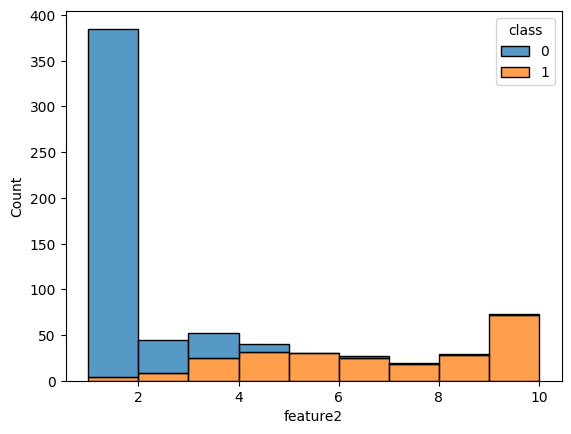

<Axes: xlabel='feature3', ylabel='Count'>

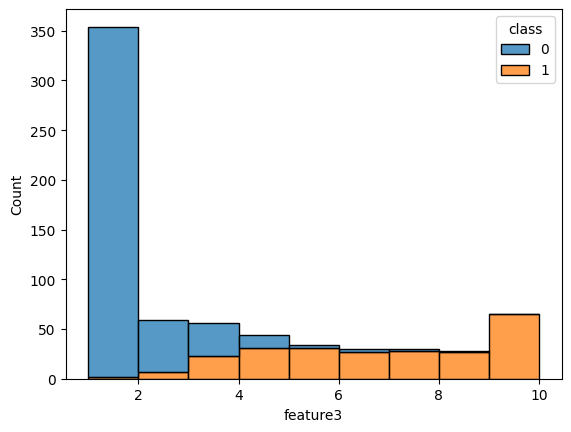

<Axes: xlabel='feature4', ylabel='Count'>

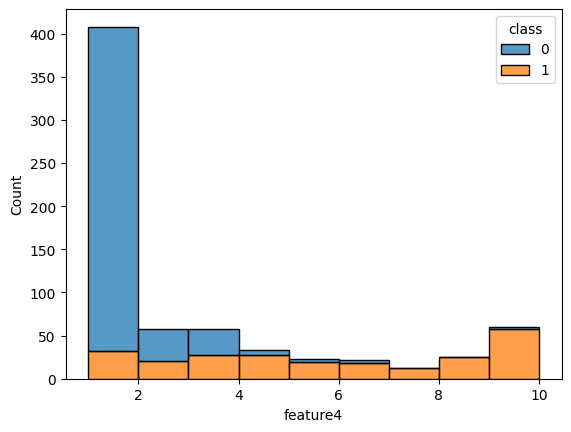

<Axes: xlabel='feature5', ylabel='Count'>

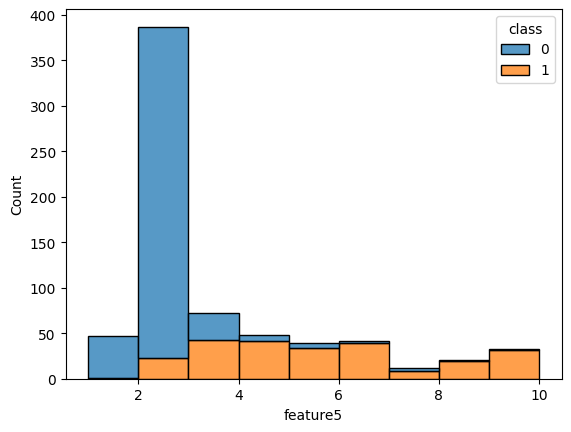

<Axes: xlabel='feature6', ylabel='Count'>

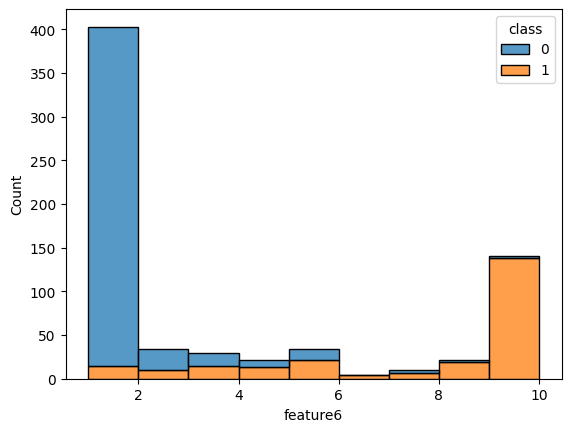

<Axes: xlabel='feature7', ylabel='Count'>

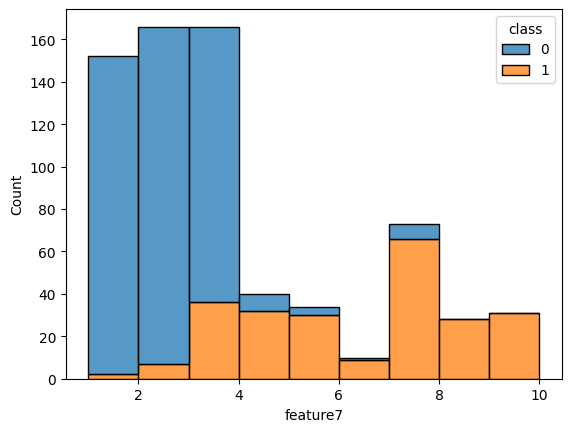

<Axes: xlabel='feature8', ylabel='Count'>

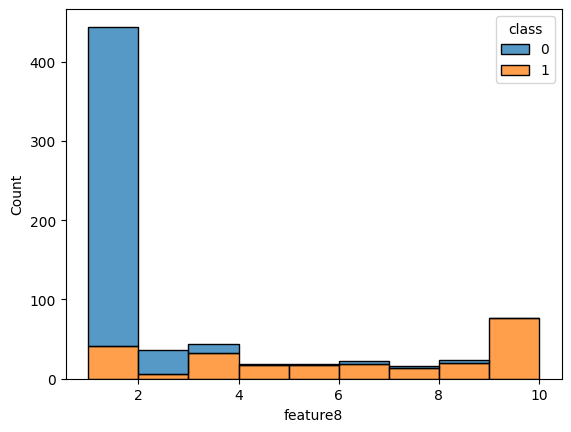

<Axes: xlabel='feature9', ylabel='Count'>

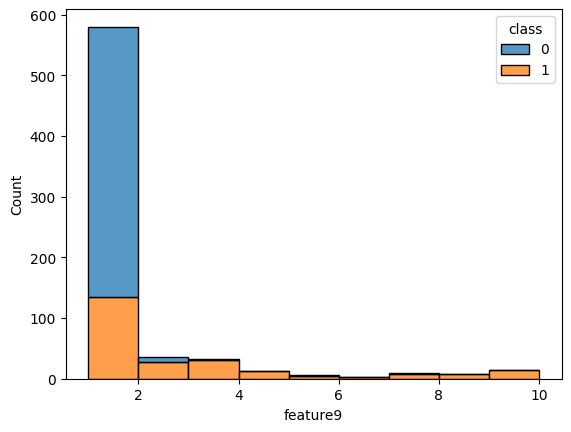

In [70]:
# plot the histogram of the relationship between each features and classes
for feature in data.columns[:-1]:
    sns.histplot(data, x=feature, hue="class", multiple="stack", binwidth = 1)
    plt.show()


In [71]:
# Split data into a training dataset and a testing dataset 
X = data.values[:, :-1]
Y = data.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

In [72]:
def generate_result(test, predict, model_name):

    # Get the result of accuracy, precision, recall, f1_score
    accuracy = accuracy_score(test, predict)
    precision = precision_score(test, predict)
    recall = recall_score(test, predict)
    f1 = f1_score(test, predict)
    
    # Print the result
    print("Accuracy of {}:".format(model_name), accuracy)
    print("Precision of {}:".format(model_name), precision)
    print("Recall of {}:".format(model_name), recall)
    print("F1-Score of {}:".format(model_name), f1)
    
    # Get the result of confusion_matrix
    c_m = confusion_matrix(test, predict)

    # Create heatmap using seaborn
    sns.heatmap(c_m, annot=True, cmap='Purples')

    # Define labels, title, and ticks
    classes = ['0', '1']
    tick_mark = np.arange(len(classes)) + 0.5

    plt.title('Confusion Matrix of ' + model_name)
    plt.xticks(tick_mark, classes)
    plt.yticks(tick_mark, classes)
    plt.xlabel('Predicted Classes')
    plt.ylabel('True Classes')
    
    # Show the plot
    plt.show()

    # Generate a table contains all the index
    print('Classification Report:')
    print(classification_report(test, predict))



Decision Tree

GridSearchCV(cv=KFold(n_splits=5, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=15),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

Best parameters: {'max_depth': 3, 'min_samples_split': 6}
Best score: 0.9392857142857144
Accuracy of decision tree: 0.9428571428571428
Precision of decision tree: 0.9423076923076923
Recall of decision tree: 0.9074074074074074
F1-Score of decision tree: 0.9245283018867925


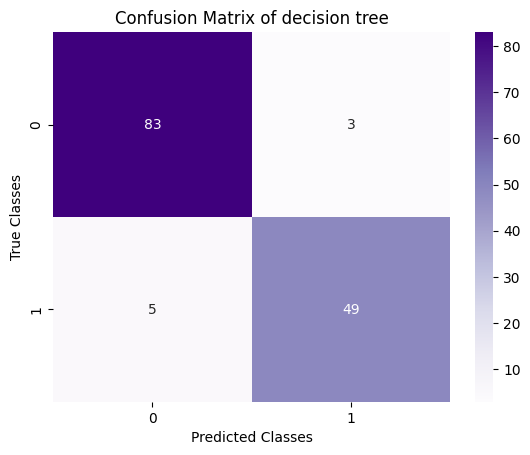

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        86
           1       0.94      0.91      0.92        54

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



In [73]:
# Generate the model
Decision_tree = DecisionTreeClassifier(random_state=15)

# Set the value range of the parameters
param_grid = {'max_depth': range(1, 10), 
              'min_samples_split': range(2, 10)}

# Choose k = 5 for K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=15)

# Find the best parameters
grid_search = GridSearchCV(Decision_tree, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Test the model on the testing dataset
best_choice = grid_search.best_estimator_
Y_pred = best_choice.predict(X_test)

generate_result(Y_test, Y_pred, 'decision tree')


SVM

GridSearchCV(cv=KFold(n_splits=5, random_state=15, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0, 0.001, 0.01, 0.1, 1, 10]})

Best parameters: {'C': 1, 'gamma': 0.01}
Best score: 0.9696428571428571
Accuracy of SVM: 0.9785714285714285
Precision of SVM: 0.9473684210526315
Recall of SVM: 1.0
F1-Score of SVM: 0.972972972972973


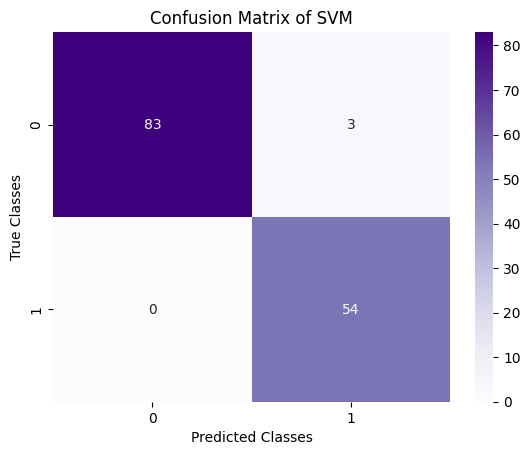

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        86
           1       0.95      1.00      0.97        54

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [74]:
# Generate the model
svm = SVC()

# Set the value range of the parameters
param_grid = {'C': [0, 0.001, 0.01, 0.1, 1, 10],
              'gamma': [0, 0.001, 0.01, 0.1, 1, 10]}

# Choose k = 5 for K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=15)

# Find the best parameters
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=cv)
grid_search.fit(X_train, Y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Test the model on the testing dataset
best_choice = grid_search.best_estimator_
Y_pred = best_choice.predict(X_test)

generate_result(Y_test, Y_pred, 'SVM')

KNN

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START n_neighbors=1, weights=distance............................
[CV 1/5; 1/18] END n_neighbors=1, weights=distance;, score=0.946 total time=   0.0s
[CV 2/5; 1/18] START n_neighbors=1, weights=distance............................
[CV 2/5; 1/18] END n_neighbors=1, weights=distance;, score=0.946 total time=   0.0s
[CV 3/5; 1/18] START n_neighbors=1, weights=distance............................
[CV 3/5; 1/18] END n_neighbors=1, weights=distance;, score=0.946 total time=   0.0s
[CV 4/5; 1/18] START n_neighbors=1, weights=distance............................
[CV 4/5; 1/18] END n_neighbors=1, weights=distance;, score=0.973 total time=   0.0s
[CV 5/5; 1/18] START n_neighbors=1, weights=distance............................
[CV 5/5; 1/18] END n_neighbors=1, weights=distance;, score=0.964 total time=   0.0s
[CV 1/5; 2/18] START n_neighbors=1, weights=uniform.............................
[CV 1/5; 2/18] END n_neighbors=1,

GridSearchCV(cv=KFold(n_splits=5, random_state=15, shuffle=True),
             estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': range(1, 10),
                         'weights': ['distance', 'uniform']},
             verbose=10)

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.9714285714285713
Accuracy of KNN: 0.9714285714285714
Precision of KNN: 0.9464285714285714
Recall of KNN: 0.9814814814814815
F1-Score of KNN: 0.9636363636363636


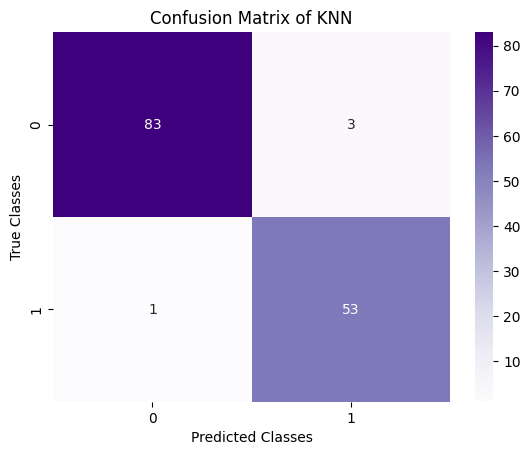

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.95      0.98      0.96        54

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [75]:
# Generate the model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Set the value range of the parameters
param_gird={
    "n_neighbors":range(1,10),
    "weights": ["distance", "uniform"]
} 

# Choose k = 5 for K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=15)

# Find the best parameters
grid_search = GridSearchCV(knn, param_grid = param_gird, cv=cv, verbose=10)
grid_search.fit(X_train, Y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Test the model on the testing dataset
best_choice = grid_search.best_estimator_
Y_pred = best_choice.predict(X_test)

generate_result(Y_test, Y_pred, 'KNN')